In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'data/Data Sensus 2022.xlsx'
geo_penduduk = pd.read_excel(file_path, sheet_name='03 - Data Rumah Tangga')
geo_penduduk.head()

,Provinsi,Perkotaan,Perdesaan
0,ACEH,429621,853211.0
1,SUMATERA UTARA,1935211,1592062.0
2,SUMATERA BARAT,639736,698055.0
3,RIAU,623161,963337.0
4,JAMBI,296355,607245.0


In [3]:
geo_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   34 non-null     object 
 1   Perkotaan  34 non-null     int64  
 2   Perdesaan  33 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 948.0+ bytes


### Data Cleaning

In [4]:
geo_penduduk.isnull().sum()

Provinsi     0
Perkotaan    0
Perdesaan    1
dtype: int64

In [5]:
# Mengisi nilai null dengan 0
geo_penduduk.fillna(0, inplace=True)

In [6]:
# Ubah tipe data Perdesaan
geo_penduduk['Perdesaan'] = geo_penduduk['Perdesaan'].astype(int)

### Exploratory Data Analysis

In [7]:
# Hitung Kategori
totals = {
    'Kategori' : [
        'Perdesaan',
        'Perkotaan',
    ],
    'Total Penduduk' : [
        geo_penduduk['Perdesaan'].sum(),
        geo_penduduk['Perkotaan'].sum(),
    ]
}

# Ubah Ke dataframe
geo_totals = pd.DataFrame(totals)

# Tampilkan Dataframe
geo_totals

,Kategori,Total Penduduk
0,Perdesaan,30973629
1,Perkotaan,39655323


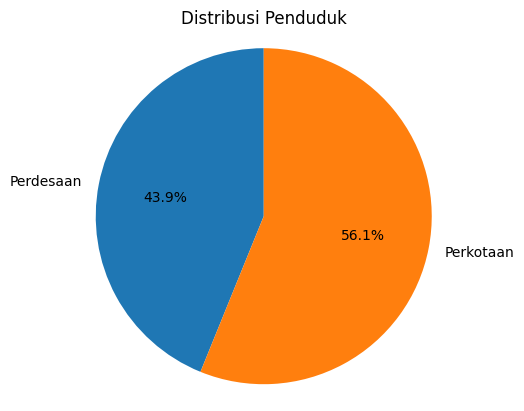

In [8]:
# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(geo_totals['Total Penduduk'], labels=geo_totals['Kategori'], autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title('Distribusi Penduduk')
plt.show()

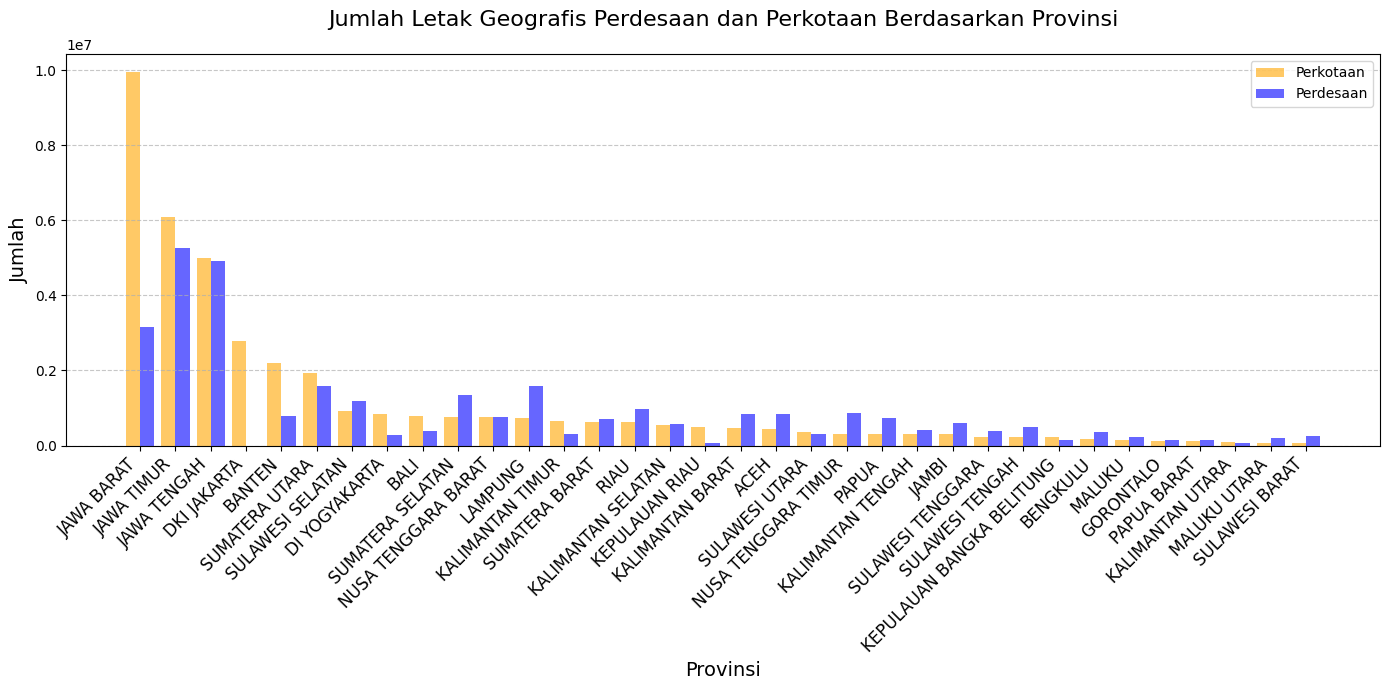

In [9]:
import matplotlib.pyplot as plt

# Filter data untuk letak penduduk
geo_penduduk_data = geo_penduduk[['Provinsi', 'Perkotaan', 'Perdesaan']]

# Urutkan data berdasarkan jumlah penduduk perkotaan
geo_penduduk_data_sorted = geo_penduduk_data.sort_values(by='Perkotaan', ascending=False)

# Menentukan posisi x untuk batang
x = range(len(geo_penduduk_data_sorted['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Plot batang untuk Perkotaan
plt.bar([p - 0.2 for p in x], geo_penduduk_data_sorted['Perkotaan'], color='orange', width=0.4, label='Perkotaan', alpha=0.6, align='center')

# Plot batang untuk Perdesaan
plt.bar([p + 0.2 for p in x], geo_penduduk_data_sorted['Perdesaan'], color='blue', width=0.4, label='Perdesaan', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Letak Geografis Perdesaan dan Perkotaan Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks([p for p in x], geo_penduduk_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [10]:
# Jumlahkan penduduk perdaerahnya 
geo_penduduk['Total Penduduk'] = geo_penduduk['Perkotaan'] + geo_penduduk['Perdesaan']
geo_penduduk.head()

,Provinsi,Perkotaan,Perdesaan,Total Penduduk
0,ACEH,429621,853211,1282832
1,SUMATERA UTARA,1935211,1592062,3527273
2,SUMATERA BARAT,639736,698055,1337791
3,RIAU,623161,963337,1586498
4,JAMBI,296355,607245,903600


In [11]:
# Membuat hitungan rasio antara kedua nya
geo_penduduk['Rasio Kependudukan'] = (geo_penduduk['Perkotaan'] / geo_penduduk['Perdesaan']).round(2)
geo_penduduk.head()

,Provinsi,Perkotaan,Perdesaan,Total Penduduk,Rasio Kependudukan
0,ACEH,429621,853211,1282832,0.50
1,SUMATERA UTARA,1935211,1592062,3527273,1.22
2,SUMATERA BARAT,639736,698055,1337791,0.92
3,RIAU,623161,963337,1586498,0.65
4,JAMBI,296355,607245,903600,0.49


### Analisis Aset Kepemilikan Penduduk Indonesia

In [12]:
aset_penduduk = pd.read_excel(file_path, sheet_name='04 - Data Status Rumah')
aset_penduduk.head()

,Provinsi,Milik Sendiri,Kontrak/ Sewa,Bebas Sewa,Lainnya
0,ACEH,1049601,66278,160925,6027
1,SUMATERA UTARA,2465653,386442,636862,38316
2,SUMATERA BARAT,961448,107721,262905,5718
3,RIAU,1210766,158448,192685,24599
4,JAMBI,773027,38131,87321,5122


In [13]:
aset_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provinsi       34 non-null     object
 1   Milik Sendiri  34 non-null     int64 
 2   Kontrak/ Sewa  34 non-null     int64 
 3   Bebas Sewa     34 non-null     int64 
 4   Lainnya        34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [14]:
aset_penduduk.isnull().sum()

Provinsi         0
Milik Sendiri    0
Kontrak/ Sewa    0
Bebas Sewa       0
Lainnya          0
dtype: int64

#### Exploratory Data Analysis

In [15]:
# hitung keseluruhan masing-masing kategori aset
totals = {
    'Keterangan Aset' : [
        'Milik Sendiri',
        'Kontrak/Sewa',
        'Bebas Sewa',
        'Lainnya'
    ],
    'Total Penduduk' : [ 
        aset_penduduk['Milik Sendiri'].sum(),
        aset_penduduk['Kontrak/ Sewa'].sum(),
        aset_penduduk['Bebas Sewa'].sum(),
        aset_penduduk['Lainnya'].sum()
    ]
}

# Ubah ke dataframe
aset_total = pd.DataFrame(totals)

# Tampilkan Dataframe
aset_total

,Keterangan Aset,Total Penduduk
0,Milik Sendiri,58787876
1,Kontrak/Sewa,4222666
2,Bebas Sewa,6988388
3,Lainnya,630019


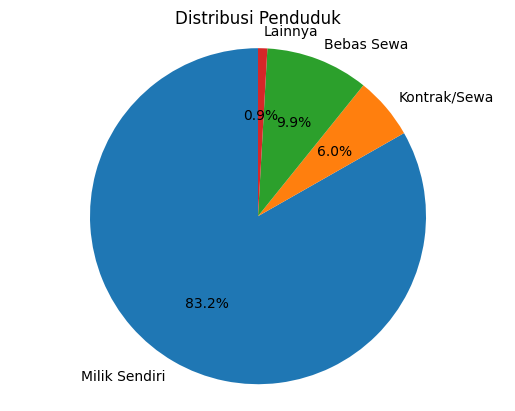

In [16]:
# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(aset_total['Total Penduduk'], labels=aset_total['Keterangan Aset'], autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title('Distribusi Penduduk')
plt.show()

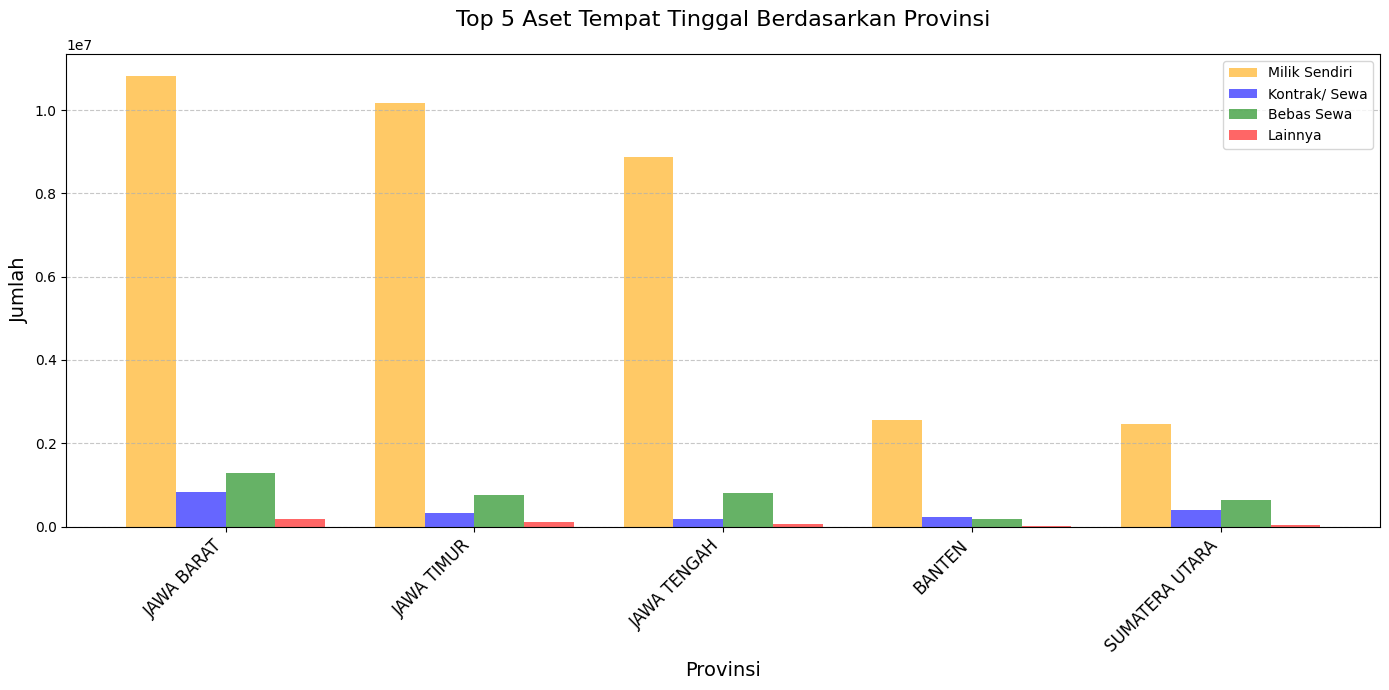

In [19]:
# Filter data untuk Aset Penduduk
aset_penduduk_data = aset_penduduk[['Provinsi', 'Milik Sendiri', 'Kontrak/ Sewa', 'Bebas Sewa', 'Lainnya']]

# Urutkan DataFrame berdasarkan kolom 'Milik Sendiri' secara menurun
aset_penduduk_data_sorted = aset_penduduk_data.sort_values(by='Milik Sendiri', ascending=False)

# Ambil 5 provinsi teratas
top_5_data = aset_penduduk_data_sorted.head(5)

# Menentukan posisi x 
x = range(len(top_5_data['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Plot batang untuk setiap kategori
plt.bar([p - 0.3 for p in x], top_5_data['Milik Sendiri'], color='orange', width=0.2, label='Milik Sendiri', alpha=0.6, align='center')
plt.bar([p - 0.1 for p in x], top_5_data['Kontrak/ Sewa'], color='blue', width=0.2, label='Kontrak/ Sewa', alpha=0.6, align='center')
plt.bar([p + 0.1 for p in x], top_5_data['Bebas Sewa'], color='green', width=0.2, label='Bebas Sewa', alpha=0.6, align='center')
plt.bar([p + 0.3 for p in x], top_5_data['Lainnya'], color='red', width=0.2, label='Lainnya', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Top 5 Aset Tempat Tinggal Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks([p for p in x], top_5_data['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [21]:
# Menambahkan kolom Rasio Aset Penduduk
aset_penduduk['Total Aset'] = (aset_penduduk['Milik Sendiri'] + 
                            aset_penduduk['Kontrak/ Sewa'] + 
                            aset_penduduk['Bebas Sewa'] + 
                            aset_penduduk['Lainnya'])

# Menambahkan kolom Rasio Aset Penduduk dan membulatkan hasilnya
aset_penduduk['Rasio Aset Penduduk'] = (aset_penduduk['Milik Sendiri'] / aset_penduduk['Total Aset']).round(2)
# Tampilkan hasilnya
aset_penduduk.head()

,Provinsi,Milik Sendiri,Kontrak/ Sewa,Bebas Sewa,Lainnya,Total Aset,Rasio Aset Penduduk
0,ACEH,1049601,66278,160925,6027,1282831,0.82
1,SUMATERA UTARA,2465653,386442,636862,38316,3527273,0.70
2,SUMATERA BARAT,961448,107721,262905,5718,1337792,0.72
3,RIAU,1210766,158448,192685,24599,1586498,0.76
4,JAMBI,773027,38131,87321,5122,903601,0.86


### Analisis Keluar Masuk Penduduk Indonesia

In [22]:
migrasi_penduduk = pd.read_excel(file_path, sheet_name='10 - Migrasi')
migrasi_penduduk.head()

,Provinsi,Migran LK,Migran PR,Non Migran LK,Non Migran PR
0,ACEH,106302,107942,2609084,2584527
1,SUMATERA UTARA,282211,287084,7302782,7243129
2,SUMATERA BARAT,209948,189967,2631854,2608860
3,RIAU,960486,896741,2422965,2334193
4,JAMBI,348401,311346,1500868,1470521


In [23]:
migrasi_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provinsi       34 non-null     object
 1   Migran LK      34 non-null     int64 
 2   Migran PR      34 non-null     int64 
 3   Non Migran LK  34 non-null     int64 
 4   Non Migran PR  34 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [24]:
migrasi_penduduk.isnull().sum()

Provinsi         0
Migran LK        0
Migran PR        0
Non Migran LK    0
Non Migran PR    0
dtype: int64

#### Exploratory

In [25]:
# Hitung Semua Kategori Penduduk 
totals = {
    'Kategori' : [
        'Migran',
        'Non Migran',
    ],
    'Total Penduduk' : [
        migrasi_penduduk['Migran LK'].sum() + migrasi_penduduk['Migran PR'].sum(),
        migrasi_penduduk['Non Migran LK'].sum() + migrasi_penduduk['Non Migran PR'].sum()
    ],
    'Rasio' : [
        (migrasi_penduduk['Migran LK'].sum() + migrasi_penduduk['Migran PR'].sum()) / geo_penduduk['Perkotaan'].sum(),
        (migrasi_penduduk['Non Migran LK'].sum() + migrasi_penduduk['Non Migran PR'].sum()) / geo_penduduk['Perkotaan'].sum()
    ]
}

# Ubah ke DataFrame
migran_totals = pd.DataFrame(totals)

# Tampilkan dataframe
migran_totals

,Kategori,Total Penduduk,Rasio
0,Migran,27098069,0.683340
1,Non Migran,248675706,6.270929


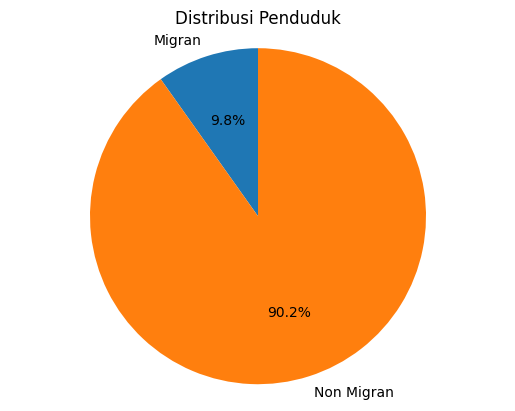

In [26]:
# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(migran_totals['Total Penduduk'], labels=migran_totals['Kategori'], autopct='%1.1f%%', startangle=90)
ax.axis('equal') 

plt.title('Distribusi Penduduk')
plt.show()

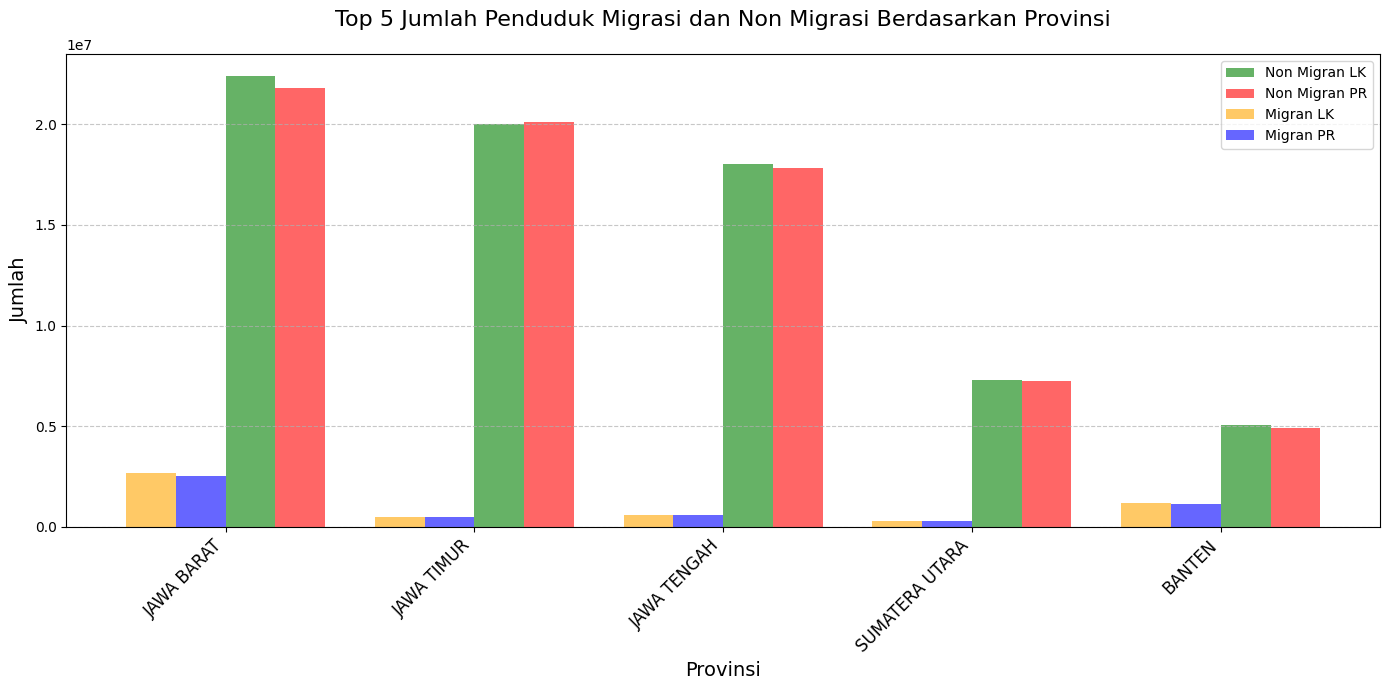

In [29]:
# Filter data untuk Migrasi Penduduk
migrasi_penduduk_data = migrasi_penduduk[['Provinsi', 'Non Migran LK', 'Non Migran PR', 'Migran LK', 'Migran PR']]

# Urutkan DataFrame berdasarkan kolom 'Non Migran LK' 
migrasi_penduduk_data_sorted = migrasi_penduduk_data.sort_values(by='Non Migran LK', ascending=False)

# Ambil 5 provinsi teratas
top_5_data = migrasi_penduduk_data_sorted.head(5)

# Menentukan posisi x 
x = range(len(top_5_data['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Plot batang untuk setiap kategori
plt.bar([p + 0.1 for p in x], top_5_data['Non Migran LK'], color='green', width=0.2, label='Non Migran LK', alpha=0.6, align='center')
plt.bar([p + 0.3 for p in x], top_5_data['Non Migran PR'], color='red', width=0.2, label='Non Migran PR', alpha=0.6, align='center')
plt.bar([p - 0.3 for p in x], top_5_data['Migran LK'], color='orange', width=0.2, label='Migran LK', alpha=0.6, align='center')
plt.bar([p - 0.1 for p in x], top_5_data['Migran PR'], color='blue', width=0.2, label='Migran PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Top 5 Jumlah Penduduk Migrasi dan Non Migrasi Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x 
plt.xticks([p for p in x], top_5_data['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [30]:
# Menambahkan kolom Rasio Migrasi Penduduk
migrasi_penduduk['Total Penduduk'] = (migrasi_penduduk['Migran LK'] + 
                            migrasi_penduduk['Migran PR'] + 
                            migrasi_penduduk['Non Migran LK'] + 
                            migrasi_penduduk['Non Migran PR'])

# Menambahkan kolom Rasio Migrasi Penduduk dan membulatkan hasilnya
migrasi_penduduk['Rasio Migrasi dan Non Penduduk'] = (migrasi_penduduk['Non Migran LK'] / migrasi_penduduk['Total Penduduk']).round(2)
# Tampilkan hasilnya
migrasi_penduduk.head()

,Provinsi,Migran LK,Migran PR,Non Migran LK,Non Migran PR,Total Penduduk,Rasio Migrasi dan Non Penduduk
0,ACEH,106302,107942,2609084,2584527,5407855,0.48
1,SUMATERA UTARA,282211,287084,7302782,7243129,15115206,0.48
2,SUMATERA BARAT,209948,189967,2631854,2608860,5640629,0.47
3,RIAU,960486,896741,2422965,2334193,6614385,0.37
4,JAMBI,348401,311346,1500868,1470521,3631136,0.41
